Dataset Loaded Successfully!

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

📊 MODEL PERFORMANCE
---------------------------------
Accuracy: 0.9211

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



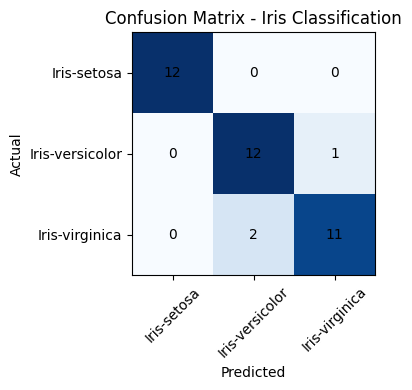


Feature Importances:
PetalLengthCm    0.464829
PetalWidthCm     0.389203
SepalLengthCm    0.121280
SepalWidthCm     0.024688
dtype: float64


In [2]:
# ------------------------------------------------------------
# TASK 1 — Iris Flower Classification
# Dataset Used: Iris.csv (uploaded by user)
# ------------------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. LOAD THE DATASET
# ------------------------------------------------------------

df = pd.read_csv("/content/sample_data/Iris.csv")   # <-- Your uploaded dataset
df = df.drop("Id", axis=1)               # Remove useless ID column

print("Dataset Loaded Successfully!\n")
print(df.head())

# ------------------------------------------------------------
# 2. ENCODE TARGET COLUMN (Species)
# ------------------------------------------------------------

label = LabelEncoder()
df["Species"] = label.fit_transform(df["Species"])

# ------------------------------------------------------------
# 3. FEATURES AND TARGET
# ------------------------------------------------------------

X = df.drop("Species", axis=1)
y = df["Species"]

# ------------------------------------------------------------
# 4. TRAIN-TEST SPLIT
# ------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# ------------------------------------------------------------
# 5. SCALING
# ------------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 6. MODEL (Random Forest)
# ------------------------------------------------------------

model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train_scaled, y_train)

# ------------------------------------------------------------
# 7. PREDICTIONS
# ------------------------------------------------------------

y_pred = model.predict(X_test_scaled)

# ------------------------------------------------------------
# 8. EVALUATION RESULTS
# ------------------------------------------------------------

accuracy = accuracy_score(y_test, y_pred)
print("\n📊 MODEL PERFORMANCE")
print("---------------------------------")
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label.classes_))

# ------------------------------------------------------------
# 9. CONFUSION MATRIX PLOT
# ------------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Iris Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(range(3), label.classes_, rotation=45)
plt.yticks(range(3), label.classes_)

# Add numbers inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 10. FEATURE IMPORTANCE
# ------------------------------------------------------------

importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False))